# 线性回归
- 线性回归基于几个假设：自变量X和因变量y之间的关系是线性的，即y可以表述成X中元素的加权和，这里通常允许包含观测值的一些噪声；其次假设任何噪声都比较正常，服从正态分布
- 用数学来表达是： y=w1x1+w2x2+w3x3+...+b其中wi是权重，xi是输入，b是偏置
- 我们需要一种度量模型优劣的方法和一种提高模型预测质量的方法，也就是损失函数和优化器
- 损失函数：线性函数拟合程度的一个度量，能够量化目标的实际值与预测值之间的差距，一般在回归中都采用均方误差，它求导之后是1：l(w,b)=0.5*(y_pred-y_label)^2。在训练模型的时候，我们希望找到一组w和b使l最小
- 解析解：线性回归的解可以用一个公式简单地表达出来，这类解叫做解析解analytical solution，但是并不是所有的问题都存在解析解。
- 随机梯度下降：它几乎可以优化所有的深度学习模型，梯度下降的最简单用法就是计算损失函数关于模型参数的导数（称为梯度）
- 超参数：可以调整，不在训练过程中更新的参数成为超参数
- 调参：调整超参数使得模型性能更好

In [24]:
%matplotlib inline

import torch as t
from pltutils import *
import pltutils
import random

In [25]:
#生成噪声
def synthetic_data(w: t.Tensor, b: float, num_examples: int):
    x = t.normal(0, 1, (num_examples, len(w)))
    y = t.matmul(x, w)+b
    y += t.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))


true_w = t.tensor([2.,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print("features:{},\n labels:{}".format(features[0], labels[0]))


features:tensor([-0.2382, -1.4973]),
 labels:tensor([8.8128])


features.shape:torch.Size([1000, 2])


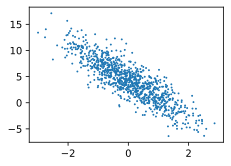

In [26]:

pltutils.set_figsize()
pltutils.plt.scatter(
    features[:, 1].detach().numpy(), labels.detach().numpy(), 1)
print("features.shape:{}".format(features.shape))


In [27]:
def data_iter(batch_size:int, features: t.Tensor, labels: t.Tensor):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=t.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]


# 内存问题
- 在运行的时候，并不是把所有的东西都读进内存